<a href="https://colab.research.google.com/github/salma71/loan_prediction_hackathon/blob/master/Load_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [107]:
train = pd.read_csv('https://raw.githubusercontent.com/salma71/loan_prediction_hackathon/master/dataset/train.csv',na_values=np.nan)
train.shape

(614, 13)

In [23]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
correla = train.corr()
correla

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


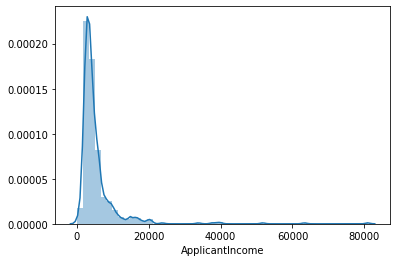

In [27]:
# unimodel visualization
# histogram
import seaborn as sns
sns.distplot(train['ApplicantIncome'], hist=True)

# X.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
# plt.show

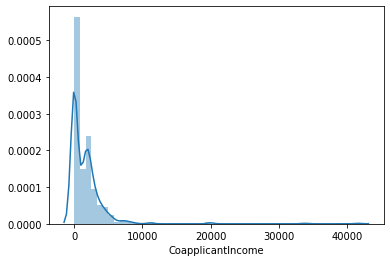

In [28]:
sns.distplot(train['CoapplicantIncome'])


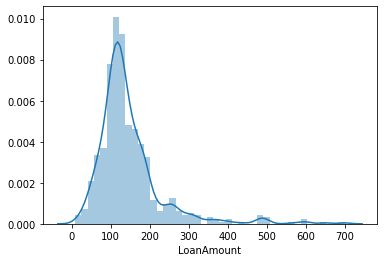

In [29]:
sns.distplot(train['LoanAmount'])


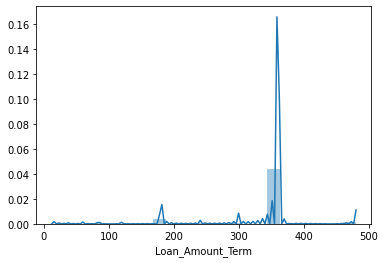

In [30]:
sns.distplot(train['Loan_Amount_Term'])

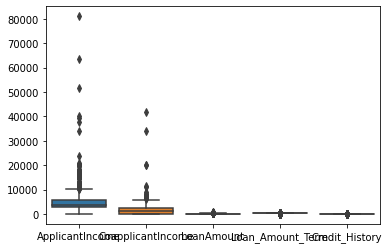

In [31]:
# some box plots
sns.boxplot(data = train.iloc[:, 1:12])

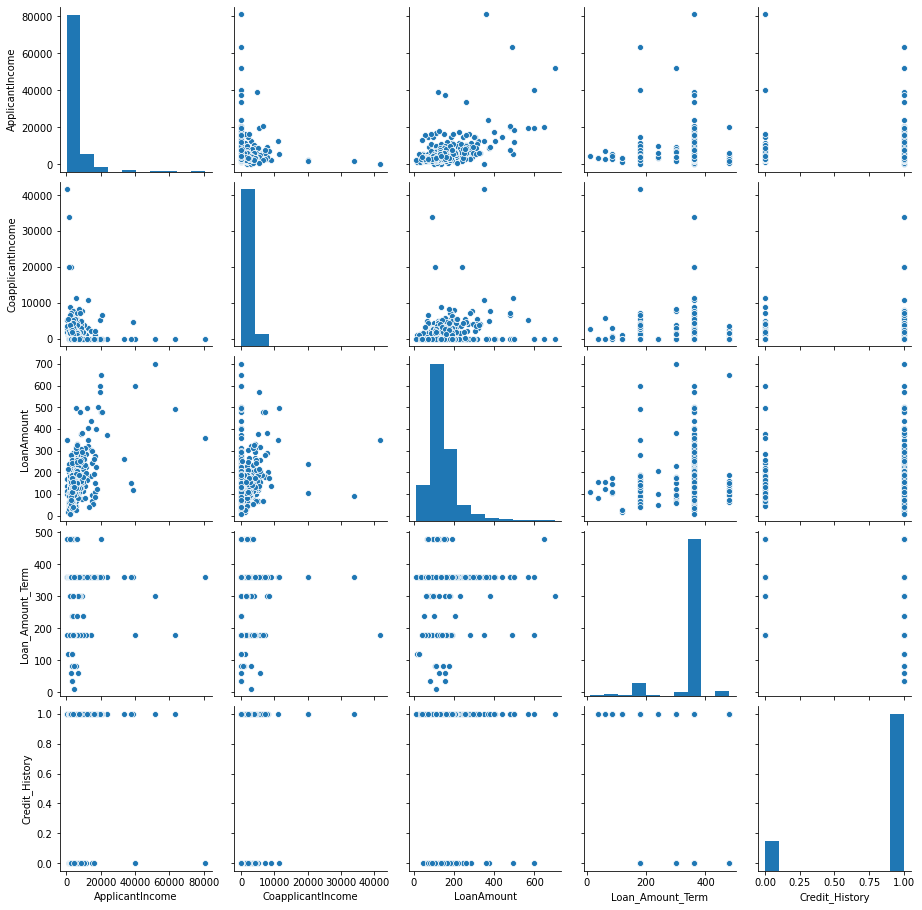

In [32]:
# multi variate plot
sns.pairplot(train.iloc[:, 1:12])

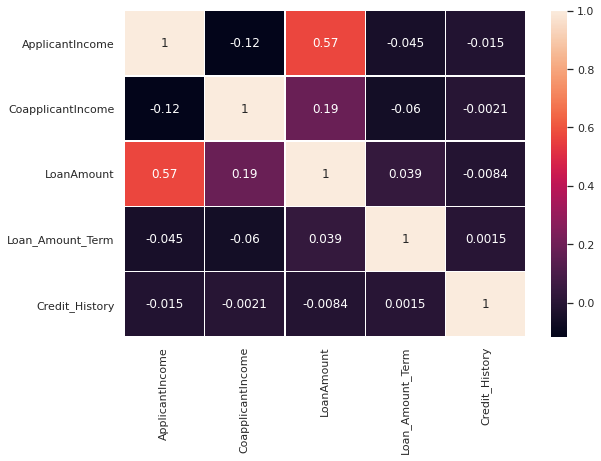

In [33]:
# heat map for correlations
sns.set()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(correla, annot=True, linewidths=0.5, ax = ax)

In [35]:
# data preprocessing
# how many NAs 
total = train.isnull().sum().sort_values(ascending=False)
dtype = train.dtypes
missing_data = pd.concat([total, dtype], axis=1, keys=['total', 'dtype'])
missing_data
# data  cleaning
# feature selection 


,total,dtype
Credit_History,50,float64
Self_Employed,32,object
LoanAmount,22,float64
Dependents,15,object
Loan_Amount_Term,14,float64
Gender,13,object
Married,3,object
Loan_Status,0,object
Property_Area,0,object
CoapplicantIncome,0,float64


In [0]:
categorical_columns = []
numeric_columns = []
for c in train.columns:
    if train[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_numeric = train[numeric_columns]
data_categorical = pd.DataFrame(train[categorical_columns])

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns


In [38]:
data_numeric.isna().sum().sort_values(ascending=False)

Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
dtype: int64

In [0]:
# normalizing and scaling


In [110]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_categorical = pd.DataFrame(imp.fit_transform(data_categorical), columns = data_categorical.columns) #only apply imputer to numeric columns
data_categorical.isna().sum().sort_values(ascending=False)

Loan_Status      0
Property_Area    0
Self_Employed    0
Education        0
Dependents       0
Married          0
Gender           0
Loan_ID          0
dtype: int64

In [112]:
# Drop loan_ID
data_categorical = data_categorical.drop(columns='Loan_ID')

KeyError: ignored

In [0]:
#join the two masked dataframes back together
train = pd.concat([data_numeric, data_categorical], axis = 1)


In [0]:
# onehot encoding for categorical variables before joining two data again
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
train.Loan_Status = encode.fit_transform(train.Loan_Status)
train.Credit_History = encode.fit_transform(train.Credit_History)
train.Gender = encode.fit_transform(train.Gender)
train.Married = encode.fit_transform(train.Married)
train.Dependents = encode.fit_transform(train.Dependents)
train.Education = encode.fit_transform(train.Education)
train.Self_Employed = encode.fit_transform(train.Self_Employed)
train.Property_Area = encode.fit_transform(train.Property_Area)


In [117]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,146.412162,360.0,2,1,0,0,0,0,2,1
1,4583.0,1508.0,128.000000,360.0,2,1,1,1,0,0,0,0
2,3000.0,0.0,66.000000,360.0,2,1,1,0,0,1,2,1
3,2583.0,2358.0,120.000000,360.0,2,1,1,0,1,0,2,1
4,6000.0,0.0,141.000000,360.0,2,1,0,0,0,0,2,1


In [0]:
X = train.iloc[:, :-1].values
y = train['Loan_Status']


In [0]:
# Split data into train and validate
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
# Evaluating the algorithms
num_folds = 10
seed = 42
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

In [125]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.798449 (0.041796)
LDA: 0.794286 (0.038167)
SVM: 0.688490 (0.050928)
KNN: 0.660122 (0.057177)
NB: 0.784082 (0.039084)
CART: 0.741388 (0.054548)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


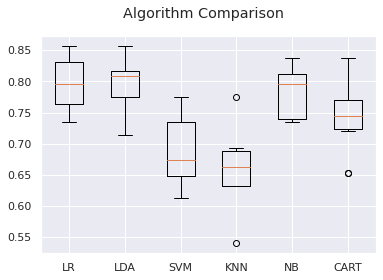

In [126]:
# Compare Algorithms
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

The results show a tight distribution for LDA which is encouraging comparing to the LR which has a wider distribution, suggesting low variance. The poor results for KNN are surprising.